In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
PATH_TEST_COLLECTION_DATA="drive/MyDrive/Uni/Master/Masterthesis/Data/test_collection/"
EXPERIMENTS_DATA="drive/MyDrive/Uni/Master/Masterthesis/Experiments/Runs/Data/"
EVALUATION_DATA="drive/MyDrive/Uni/Master/Masterthesis/Experiments/Evaluation/Data/"

# Load evaluation results data

In [16]:
import pandas as pd

In [17]:
evaluation_results = pd.read_csv(EVALUATION_DATA + "evaluation_results.csv", sep=";", decimal=",")
evaluation_results

,search_method,query_type,document_type,nDCG@10,P@5,MRR,avg_duration
0,bi_encoder,combination_free,fulltext,0.8772,0.9224,0.9592,0.186367
1,bi_encoder,combination_free,structured,0.5836,0.5673,0.6758,0.187612
2,bi_encoder,combination_free,structured_fulltext,0.5836,0.5673,0.6758,0.188673
3,bi_encoder,combination_free_synonym,fulltext,0.8459,0.8735,0.9481,0.189265
4,bi_encoder,combination_free_synonym,structured,0.5475,0.5061,0.5839,0.186531
...,...,...,...,...,...,...,...
139,tf-idf,single_keyword,structured,0.9156,0.9943,0.9857,0.001257
140,tf-idf,single_keyword,structured_fulltext,0.9201,0.9886,1.0000,0.001029
141,tf-idf,single_keyword_synonym,fulltext,0.4674,0.3600,0.7236,0.001000
142,tf-idf,single_keyword_synonym,structured,0.4291,0.2743,0.6337,0.001143


# Ergebnisqualität in Abhängigkeit der Anfrageform


In [18]:
evaluation_results["query_type"].value_counts()

,count
query_type,
combination_free,18
combination_free_synonym,18
combination_keyword,18
combination_keyword_synonym,18
single_free,18
single_free_synonym,18
single_keyword,18
single_keyword_synonym,18


## Stichwortbasierte Anfragen

In [19]:
allowed_query_types = [
    "single_keyword",
    "single_keyword_synonym",
    "combination_keyword",
    "combination_keyword_synonym",
]

keyword_queries = evaluation_results[
    evaluation_results["query_type"].isin(allowed_query_types)
    & (evaluation_results["document_type"] == "structured")
]

In [20]:
## Tabelle für Anhang
keyword_queries

,search_method,query_type,document_type,nDCG@10,P@5,MRR,avg_duration
7,bi_encoder,combination_keyword,structured,0.6742,0.6694,0.8542,0.185816
10,bi_encoder,combination_keyword_synonym,structured,0.6527,0.6408,0.8620,0.184735
19,bi_encoder,single_keyword,structured,0.6391,0.5943,0.7365,0.183600
22,bi_encoder,single_keyword_synonym,structured,0.5842,0.5143,0.7120,0.184486
31,bm25,combination_keyword,structured,0.9569,0.9959,1.0000,0.000041
34,bm25,combination_keyword_synonym,structured,0.5826,0.5224,0.8168,0.000020
43,bm25,single_keyword,structured,0.9212,0.9943,1.0000,0.000029
46,bm25,single_keyword_synonym,structured,0.4458,0.2914,0.6860,0.000029
55,cross_encoder,combination_keyword,structured,0.9436,0.9878,0.9796,2.456633
58,cross_encoder,combination_keyword_synonym,structured,0.8515,0.8816,0.9303,2.456714


In [21]:
## Pivot Tabelle für Ergebnisse erstellen

pivot_ndcg_values = keyword_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="nDCG@10",
    aggfunc="mean"
)

desired_order = [
    "single_keyword",
    "single_keyword_synonym",
    "combination_keyword",
    "combination_keyword_synonym",
]

pivot_ndcg_values = pivot_ndcg_values[desired_order]

In [22]:
pivot_ndcg_values

query_type,single_keyword,single_keyword_synonym,combination_keyword,combination_keyword_synonym
search_method,,,,
bi_encoder,0.6391,0.5842,0.6742,0.6527
bm25,0.9212,0.4458,0.9569,0.5826
cross_encoder,0.7900,0.6205,0.9436,0.8515
late_interaction,0.6928,0.6047,0.7218,0.6828
neural_sparse,0.7858,0.7079,0.8055,0.7777
tf-idf,0.9156,0.4291,0.9264,0.5621


In [23]:
latex = pivot_ndcg_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="nDCG@10 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.",
    label="tab:ndcg_keyword_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{nDCG@10 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.}
\label{tab:ndcg_keyword_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_keyword & single\_keyword\_synonym & combination\_keyword & combination\_keyword\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.6391 & 0.5842 & 0.6742 & 0.6527 \\
bm25 & 0.9212 & 0.4458 & 0.9569 & 0.5826 \\
cross\_encoder & 0.7900 & 0.6205 & 0.9436 & 0.8515 \\
late\_interaction & 0.6928 & 0.6047 & 0.7218 & 0.6828 \\
neural\_sparse & 0.7858 & 0.7079 & 0.8055 & 0.7777 \\
tf-idf & 0.9156 & 0.4291 & 0.9264 & 0.5621 \\
\bottomrule
\end{tabular}
\end{table}



In [24]:
pivot_precision_values = keyword_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="P@5",
    aggfunc="mean"
)

desired_order = [
    "single_keyword",
    "single_keyword_synonym",
    "combination_keyword",
    "combination_keyword_synonym",
]

pivot_precision_values = pivot_precision_values[desired_order]

In [25]:
pivot_precision_values

query_type,single_keyword,single_keyword_synonym,combination_keyword,combination_keyword_synonym
search_method,,,,
bi_encoder,0.5943,0.5143,0.6694,0.6408
bm25,0.9943,0.2914,0.9959,0.5224
cross_encoder,0.8114,0.5600,0.9878,0.8816
late_interaction,0.6743,0.5657,0.7429,0.6980
neural_sparse,0.7943,0.7143,0.8694,0.8163
tf-idf,0.9943,0.2743,0.9837,0.5102


In [26]:
latex = pivot_precision_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="P@5 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.",
    label="tab:p@5_keyword_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{P@5 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.}
\label{tab:p@5_keyword_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_keyword & single\_keyword\_synonym & combination\_keyword & combination\_keyword\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.5943 & 0.5143 & 0.6694 & 0.6408 \\
bm25 & 0.9943 & 0.2914 & 0.9959 & 0.5224 \\
cross\_encoder & 0.8114 & 0.5600 & 0.9878 & 0.8816 \\
late\_interaction & 0.6743 & 0.5657 & 0.7429 & 0.6980 \\
neural\_sparse & 0.7943 & 0.7143 & 0.8694 & 0.8163 \\
tf-idf & 0.9943 & 0.2743 & 0.9837 & 0.5102 \\
\bottomrule
\end{tabular}
\end{table}



In [28]:
pivot_mrr_values = keyword_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="MRR",
    aggfunc="mean"
)

desired_order = [
    "single_keyword",
    "single_keyword_synonym",
    "combination_keyword",
    "combination_keyword_synonym",
]

pivot_mrr_values = pivot_mrr_values[desired_order]

In [ ]:
pivot_mrr_values

query_type,single_keyword,single_keyword_synonym,combination_keyword,combination_keyword_synonym
search_method,,,,
bi_encoder,0.7365,0.7120,0.8542,0.8620
bm25,1.0000,0.6860,1.0000,0.8168
cross_encoder,0.8479,0.7330,0.9796,0.9303
late_interaction,0.8601,0.7636,0.9139,0.8655
neural_sparse,0.9095,0.8212,0.9422,0.9020
tf-idf,0.9857,0.6337,1.0000,0.7301


In [29]:
latex = pivot_mrr_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="MRR je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.",
    label="tab:mrr_keyword_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{MRR je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.}
\label{tab:mrr_keyword_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_keyword & single\_keyword\_synonym & combination\_keyword & combination\_keyword\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.7365 & 0.7120 & 0.8542 & 0.8620 \\
bm25 & 1.0000 & 0.6860 & 1.0000 & 0.8168 \\
cross\_encoder & 0.8479 & 0.7330 & 0.9796 & 0.9303 \\
late\_interaction & 0.8601 & 0.7636 & 0.9139 & 0.8655 \\
neural\_sparse & 0.9095 & 0.8212 & 0.9422 & 0.9020 \\
tf-idf & 0.9857 & 0.6337 & 1.0000 & 0.7301 \\
\bottomrule
\end{tabular}
\end{table}



## Freitextbasierte Anfragen

In [30]:
allowed_query_types = [
    "single_free",
    "single_free_synonym",
    "combination_free",
    "combination_free_synonym",
]

free_text_queries = evaluation_results[
    evaluation_results["query_type"].isin(allowed_query_types)
    & (evaluation_results["document_type"] == "structured")
]

In [31]:
## Tabelle für Anhang
free_text_queries

,search_method,query_type,document_type,nDCG@10,P@5,MRR,avg_duration
1,bi_encoder,combination_free,structured,0.5836,0.5673,0.6758,0.187612
4,bi_encoder,combination_free_synonym,structured,0.5475,0.5061,0.5839,0.186531
13,bi_encoder,single_free,structured,0.4882,0.4000,0.5489,0.184457
16,bi_encoder,single_free_synonym,structured,0.4247,0.3200,0.4480,0.184057
25,bm25,combination_free,structured,0.8711,0.9102,0.9796,0.000939
28,bm25,combination_free_synonym,structured,0.5092,0.4735,0.6090,0.000735
37,bm25,single_free,structured,0.6367,0.6514,0.8076,0.000571
40,bm25,single_free_synonym,structured,0.3263,0.2114,0.4215,0.000343
49,cross_encoder,combination_free,structured,0.8317,0.8980,0.9463,2.479224
52,cross_encoder,combination_free_synonym,structured,0.7568,0.7837,0.8238,2.477082


In [32]:
## Pivot Tabelle für Ergebnisse erstellen

pivot_ndcg_values = free_text_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="nDCG@10",
    aggfunc="mean"
)

desired_order = [
    "single_free",
    "single_free_synonym",
    "combination_free",
    "combination_free_synonym",
]

pivot_ndcg_values = pivot_ndcg_values[desired_order]

In [33]:
pivot_ndcg_values

query_type,single_free,single_free_synonym,combination_free,combination_free_synonym
search_method,,,,
bi_encoder,0.4882,0.4247,0.5836,0.5475
bm25,0.6367,0.3263,0.8711,0.5092
cross_encoder,0.7369,0.6274,0.8317,0.7568
late_interaction,0.5982,0.5385,0.6810,0.6564
neural_sparse,0.5540,0.4705,0.6479,0.6129
tf-idf,0.6804,0.2948,0.8980,0.5025


In [34]:
latex = pivot_ndcg_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="nDCG@10 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.",
    label="tab:ndcg_free_text_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{nDCG@10 je Suchmethode und Anfrageform unter Dokumenttyp structured_fulltext.}
\label{tab:ndcg_free_text_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_free & single\_free\_synonym & combination\_free & combination\_free\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.4882 & 0.4247 & 0.5836 & 0.5475 \\
bm25 & 0.6367 & 0.3263 & 0.8711 & 0.5092 \\
cross\_encoder & 0.7369 & 0.6274 & 0.8317 & 0.7568 \\
late\_interaction & 0.5982 & 0.5385 & 0.6810 & 0.6564 \\
neural\_sparse & 0.5540 & 0.4705 & 0.6479 & 0.6129 \\
tf-idf & 0.6804 & 0.2948 & 0.8980 & 0.5025 \\
\bottomrule
\end{tabular}
\end{table}



In [35]:
pivot_precision_values = free_text_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="P@5",
    aggfunc="mean"
)

desired_order = [
    "single_free",
    "single_free_synonym",
    "combination_free",
    "combination_free_synonym",
]

pivot_precision_values = pivot_precision_values[desired_order]

In [37]:
pivot_precision_values

query_type,single_free,single_free_synonym,combination_free,combination_free_synonym
search_method,,,,
bi_encoder,0.4000,0.3200,0.5673,0.5061
bm25,0.6514,0.2114,0.9102,0.4735
cross_encoder,0.7829,0.6229,0.8980,0.7837
late_interaction,0.5486,0.4743,0.7020,0.6694
neural_sparse,0.4686,0.3714,0.6816,0.6204
tf-idf,0.6857,0.1714,0.9429,0.4776


In [38]:
latex = pivot_precision_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="Ergebnisqualität nach P@5 der Suchmethoden für unterschiedliche Freitextanfragen",
    label="tab:p@5_free_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{Ergebnisqualität nach P@5 der Suchmethoden für unterschiedliche Freitextanfragen}
\label{tab:p@5_free_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_free & single\_free\_synonym & combination\_free & combination\_free\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.4000 & 0.3200 & 0.5673 & 0.5061 \\
bm25 & 0.6514 & 0.2114 & 0.9102 & 0.4735 \\
cross\_encoder & 0.7829 & 0.6229 & 0.8980 & 0.7837 \\
late\_interaction & 0.5486 & 0.4743 & 0.7020 & 0.6694 \\
neural\_sparse & 0.4686 & 0.3714 & 0.6816 & 0.6204 \\
tf-idf & 0.6857 & 0.1714 & 0.9429 & 0.4776 \\
\bottomrule
\end{tabular}
\end{table}



In [40]:
pivot_mrr_values = free_text_queries.pivot_table(
    index="search_method",
    columns="query_type",
    values="MRR",
    aggfunc="mean"
)

desired_order = [
    "single_free",
    "single_free_synonym",
    "combination_free",
    "combination_free_synonym",
]

pivot_mrr_values = pivot_mrr_values[desired_order]

In [42]:
pivot_mrr_values

query_type,single_free,single_free_synonym,combination_free,combination_free_synonym
search_method,,,,
bi_encoder,0.5489,0.4480,0.6758,0.5839
bm25,0.8076,0.4215,0.9796,0.6090
cross_encoder,0.8829,0.8321,0.9463,0.8238
late_interaction,0.7663,0.7265,0.8746,0.8474
neural_sparse,0.6713,0.5413,0.8012,0.7522
tf-idf,0.7508,0.2696,1.0000,0.4684


In [43]:
latex = pivot_mrr_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="Ergebnisqualität nach MRR der Suchmethoden für unterschiedliche Freitextanfragen",
    label="tab:MRR_free_queries",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{Ergebnisqualität nach MRR der Suchmethoden für unterschiedliche Freitextanfragen}
\label{tab:MRR_free_queries}
\begin{tabular}{lrrrr}
\toprule
query_type & single\_free & single\_free\_synonym & combination\_free & combination\_free\_synonym \\
search_method &  &  &  &  \\
\midrule
bi\_encoder & 0.5489 & 0.4480 & 0.6758 & 0.5839 \\
bm25 & 0.8076 & 0.4215 & 0.9796 & 0.6090 \\
cross\_encoder & 0.8829 & 0.8321 & 0.9463 & 0.8238 \\
late\_interaction & 0.7663 & 0.7265 & 0.8746 & 0.8474 \\
neural\_sparse & 0.6713 & 0.5413 & 0.8012 & 0.7522 \\
tf-idf & 0.7508 & 0.2696 & 1.0000 & 0.4684 \\
\bottomrule
\end{tabular}
\end{table}



# Ergebnisqualität in Abhängigkeit der Dokumentenrepräsentation


In [44]:
evaluation_results["document_type"].value_counts()

,count
document_type,
fulltext,48
structured,48
structured_fulltext,48


In [45]:
allowed_document_types = [
    "structured",
    "fulltext",
    "structured_fulltext",
]

document_types = evaluation_results[
    evaluation_results["document_type"].isin(allowed_document_types)
    & (evaluation_results["query_type"] == "single_keyword")
]

In [46]:
document_types

,search_method,query_type,document_type,nDCG@10,P@5,MRR,avg_duration
18,bi_encoder,single_keyword,fulltext,0.8551,0.9086,0.9643,0.205029
19,bi_encoder,single_keyword,structured,0.6391,0.5943,0.7365,0.183600
20,bi_encoder,single_keyword,structured_fulltext,0.6391,0.5943,0.7365,0.188943
42,bm25,single_keyword,fulltext,0.9208,0.9943,1.0000,0.000086
43,bm25,single_keyword,structured,0.9212,0.9943,1.0000,0.000029
44,bm25,single_keyword,structured_fulltext,0.9250,0.9886,1.0000,0.000029
66,cross_encoder,single_keyword,fulltext,0.8286,0.8114,0.9129,1.104000
67,cross_encoder,single_keyword,structured,0.7900,0.8114,0.8479,2.453286
68,cross_encoder,single_keyword,structured_fulltext,0.5662,0.5314,0.7195,2.606514
90,late_interaction,single_keyword,fulltext,0.9401,0.9943,1.0000,0.919800


In [47]:
## Pivot Tabelle für Ergebnisse erstellen

pivot_ndcg_values = document_types.pivot_table(
    index="search_method",
    columns="document_type",
    values="nDCG@10",
    aggfunc="mean"
)

desired_order = [
    "structured",
    "fulltext",
    "structured_fulltext",
]

pivot_ndcg_values = pivot_ndcg_values[desired_order]

In [48]:
pivot_ndcg_values

document_type,structured,fulltext,structured_fulltext
search_method,,,
bi_encoder,0.6391,0.8551,0.6391
bm25,0.9212,0.9208,0.9250
cross_encoder,0.7900,0.8286,0.5662
late_interaction,0.6928,0.9401,0.7108
neural_sparse,0.7858,0.8164,0.8418
tf-idf,0.9156,0.9174,0.9201


In [53]:
latex = pivot_ndcg_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="nDCG@10 je Suchmethode und Dokumentrepräsentation.",
    label="tab:nDCG_document_type",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{nDCG@10 je Suchmethode und Dokumentrepräsentation.}
\label{tab:nDCG_document_type}
\begin{tabular}{lrrrr}
\toprule
document_type & structured & fulltext & structured\_fulltext \\
search_method &  &  &  \\
\midrule
bi\_encoder & 0.6391 & 0.8551 & 0.6391 \\
bm25 & 0.9212 & 0.9208 & 0.9250 \\
cross\_encoder & 0.7900 & 0.8286 & 0.5662 \\
late\_interaction & 0.6928 & 0.9401 & 0.7108 \\
neural\_sparse & 0.7858 & 0.8164 & 0.8418 \\
tf-idf & 0.9156 & 0.9174 & 0.9201 \\
\bottomrule
\end{tabular}
\end{table}



In [54]:
## Pivot Tabelle für Ergebnisse erstellen

pivot_precision_values = document_types.pivot_table(
    index="search_method",
    columns="document_type",
    values="P@5",
    aggfunc="mean"
)

desired_order = [
    "structured",
    "fulltext",
    "structured_fulltext",
]

pivot_precision_values = pivot_precision_values[desired_order]

In [55]:
pivot_precision_values

document_type,structured,fulltext,structured_fulltext
search_method,,,
bi_encoder,0.5943,0.9086,0.5943
bm25,0.9943,0.9943,0.9886
cross_encoder,0.8114,0.8114,0.5314
late_interaction,0.6743,0.9943,0.7257
neural_sparse,0.7943,0.8400,0.8686
tf-idf,0.9943,0.9943,0.9886


In [57]:
latex = pivot_precision_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="P@5 je Suchmethode und Dokumentrepräsentation.",
    label="tab:p@5_document_type",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{P@5 je Suchmethode und Dokumentrepräsentation.}
\label{tab:p@5_document_type}
\begin{tabular}{lrrrr}
\toprule
document_type & structured & fulltext & structured\_fulltext \\
search_method &  &  &  \\
\midrule
bi\_encoder & 0.5943 & 0.9086 & 0.5943 \\
bm25 & 0.9943 & 0.9943 & 0.9886 \\
cross\_encoder & 0.8114 & 0.8114 & 0.5314 \\
late\_interaction & 0.6743 & 0.9943 & 0.7257 \\
neural\_sparse & 0.7943 & 0.8400 & 0.8686 \\
tf-idf & 0.9943 & 0.9943 & 0.9886 \\
\bottomrule
\end{tabular}
\end{table}



In [58]:
## Pivot Tabelle für Ergebnisse erstellen

pivot_mrr_values = document_types.pivot_table(
    index="search_method",
    columns="document_type",
    values="MRR",
    aggfunc="mean"
)

desired_order = [
    "structured",
    "fulltext",
    "structured_fulltext",
]

pivot_mrr_values = pivot_mrr_values[desired_order]

In [60]:
pivot_mrr_values

document_type,structured,fulltext,structured_fulltext
search_method,,,
bi_encoder,0.7365,0.9643,0.7365
bm25,1.0000,1.0000,1.0000
cross_encoder,0.8479,0.9129,0.7195
late_interaction,0.8601,1.0000,0.8923
neural_sparse,0.9095,0.9310,0.9571
tf-idf,0.9857,1.0000,1.0000


In [61]:
latex = pivot_mrr_values.to_latex(
    float_format="%.4f",   # z.B. 3 Nachkommastellen
    index=True,
    escape=True,           # Unterstriche etc. escapen
    caption="MRR je Suchmethode und Dokumentrepräsentation.",
    label="tab:mrr_document_type",
    column_format="lrrrr"  # 1 linke Spalte + 4 numerische
)
print(latex)

\begin{table}
\caption{MRR je Suchmethode und Dokumentrepräsentation.}
\label{tab:mrr_document_type}
\begin{tabular}{lrrrr}
\toprule
document_type & structured & fulltext & structured\_fulltext \\
search_method &  &  &  \\
\midrule
bi\_encoder & 0.7365 & 0.9643 & 0.7365 \\
bm25 & 1.0000 & 1.0000 & 1.0000 \\
cross\_encoder & 0.8479 & 0.9129 & 0.7195 \\
late\_interaction & 0.8601 & 1.0000 & 0.8923 \\
neural\_sparse & 0.9095 & 0.9310 & 0.9571 \\
tf-idf & 0.9857 & 1.0000 & 1.0000 \\
\bottomrule
\end{tabular}
\end{table}



## Latenzen der Suchmethoden

In [ ]:
latency = evaluation_results.pivot_table(
    columns="search_method",
    values="avg_duration",
    aggfunc="mean"
)



In [ ]:
latency

search_method,bi_encoder,bm25,cross_encoder,late_interaction,neural_sparse,tf-idf
avg_duration,0.188193,0.000303,2.067822,1.049251,0.199407,0.001045


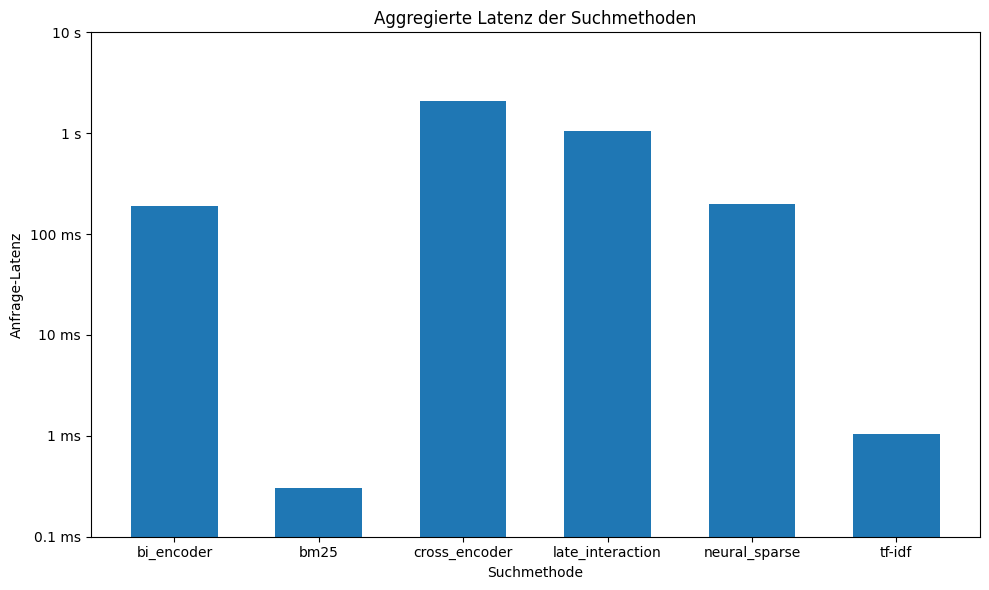

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

latency_series = latency.iloc[0]

# x-Positionen
x = np.arange(len(latency_series))

plt.figure(figsize=(10, 6))
plt.bar(
    x,
    latency_series.values,
    width=0.6
)

plt.yscale('log')
plt.title('Aggregierte Latenz der Suchmethoden')
plt.xlabel('Suchmethode')
plt.ylabel('Anfrage-Latenz')

# x-Achse beschriften
plt.xticks(x, latency_series.index, rotation=0)

plt.yticks(
    [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],
    ['0.1 ms', '1 ms', '10 ms', '100 ms', '1 s', '10 s']
)

plt.minorticks_off()

plt.tight_layout()
plt.show()


In [ ]:
latency_document = evaluation_results.pivot_table(
    index="document_type",
    columns="search_method",
    values="avg_duration",
    aggfunc="mean"
)


In [ ]:
latency_document

search_method,bi_encoder,bm25,cross_encoder,late_interaction,neural_sparse,tf-idf
document_type,,,,,,
fulltext,0.190393,0.000259,1.136209,0.908242,0.202654,0.001023
structured,0.185162,0.000338,2.463449,1.065700,0.197924,0.001096
structured_fulltext,0.189025,0.000311,2.603808,1.173812,0.197644,0.001015
